# 모집단, 표본, 확률

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

구할 수 있는 또는 주어진 데이터만을 이용하여
전체 데이터의 통계적 성질을 추측하는 추측통계의 기본 개념을 소개한다.

- 모집단과 표본
- 표본추출
- 확률변수와 확률분포

## 모집단

모집단<font size='2'>population</font>은 통계적 성질을 알고자 하는 관측 대상들의 집단 전체를 가리킨다.
반면에 표본<font size='2'>sample</font>는 관측 대상 중에 실제로 측정된 또는 관찰된 결과들의 집합이다.
표본추출<font size='2'>sampling</font>은 모집단에서 표본을 선택하는 과정이다.

표본추출을 통해 얻어진 표본의 평균값, 분산 등이 (표본)통계량<font size='2'>statistic</font>이며,
모집단에 대한 평균값과 분산인 모평균, 모분산 등은 모수<font size='2'>parameter</font>라 부른다.
모수를 파악하는 일은 일반적으로 매우 어렵거나 불가능하다.
따라서 표본통계량을 이용하여 모수를 추정하며,
이런 의미에서표본평균, 표본분산 등을 모수에 대한 추정값으로 부른다.
이런 과정을 통틀어 추측통계<font size='2'>inferential statistics</font>라 부른다.
아래 그림이 추측통계의 주요 개념인 모집단, 표본, (표본)통계량, 모수의 관계를 잘 설명한다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/ch04/img-4-1.jpg?raw=true" style="width:600px"></div></p>

### 모집단

모집단과 표본을 설명하기 위해 캘리포니아 주택가격 데이터를 모집단으로 예제로 활용한다.

**캘리포니아 주택가격 데이터셋**

1990년도에 시행된 미국 캘리포니아 주의 20,640개 구역별 주택가격 데이터셋은
구역별로 경도, 위도, 주택 건물 중위연령, 총 방 수, 총 침실 수, 인구, 가구수, 가구중위소득, 주택중위가격, 해안근접도
등 총 10개의 **특성**<font size='2'>feature</font>을 포함하는 인구조사 자료다. 
참고로 통계 분야에서는 특성을 변수 또는 변인 등으로 부르지만 머신러닝 분야에서는 특성이라 부르는 게 일반적이다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/handson-ml3/master/jupyter-book/imgs/ch02/LA-USA01.png" width="600"></div></p>

**데이터 구하기**

많은 곳에서 구할 수 있지만 여기서는 데이터 기본저장소에서 csv 파일을 데이터프레임으로 불러온다.

In [7]:
housing = pd.read_csv(data_url+"california_housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


인덱스의 이름으로 구역을 의미하는 `district`를 지정한다.

In [8]:
housing.index.name = 'disstrict'
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
disstrict,,,,,,,,,,
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


**데이터 정보 요약**

* 20,640 개 구역별로 10개의 항목 조사
* 해안 근접도를 뜻하는 `ocean_proximity` 특성은 **범주형**<font size='2'>categorical</font>이고 
    나머지는 **수치형**<font size='2'>numerical</font> 특성임.
    - 특성의  `Dtype`이 `object`: 범주형 데이터
    - 특성의  `Dtype`이 `float64`: 수치형 데이터
* 총 방 수를 뜻하는 `total_bedrooms` 특성은 207개의 null 값, 즉 결측치 포함.

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**가구중위소득과 주택중위가격**

10개 특성 중에서 여기서는 가구중위소득과 주택중위가격 특성만 이용한다.

In [10]:
housing = housing.loc[:, ['median_income', 'median_house_value']]

In [11]:
housing

,median_income,median_house_value
disstrict,,
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0


**산점도 확인**

소득이 많을 수록 보다 비싼 집에 사는 경향이 크다는 측면에서 보았을 때
주택중위가격과 가구중위소득간의 관계가 밀접할 밖에 없다.
이점을 산점도를 이용하여 확인해본다.

데이터프레임은 matploblib 라이브러리를 활용하여 자체적로 그래프를 그리는 기능을 제공한다.
아래 코드는 산점도를 두 특성을 이용하여 산점도를 그린다.

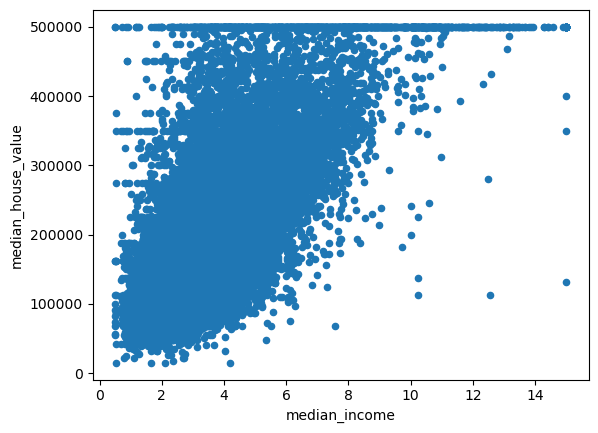

In [12]:
housing.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

주택중위가격이 500,000 정도인 경우에 직선 형태의 산포도가 보이는데, 매우 부자연스럽다.
어떤 이유에서인지 알아보기 위해 데이터분포 확인해본다.

In [13]:
housing.describe()

,median_income,median_house_value
count,20640.000000,20640.000000
mean,3.870671,206855.816909
std,1.899822,115395.615874
min,0.499900,14999.000000
25%,2.563400,119600.000000
50%,3.534800,179700.000000
75%,4.743250,264725.000000
max,15.000100,500001.000000


중위주택가격의 최댓값이 500,001인데 자연스럽지 못하다.
아마도 50만 달러 이상은 50만1 달러로 지정한 것으로 보인다.
따라서 이런 데이터는 부자연스럽다는 측면에서 이상치로 고려될 수 있기에
여기서는 데이터셋에서 제거한다.

### 데이터 이상치 제거

주택중위가격이 50만 달러를 초과하는 경우 데이터에서 삭제하기 위해 부울 인덱싱을 활용한다.

**부울 인덱싱**

부울 인덱싱<font size='2'>Boolean indexing</font>은
`True` 또는 `False`의 진리값으로만 구성된 어레이 또는 데이터프레임을 이용하여
`True`에 해당하는 행 또는 열만 남기고 나머지는 제거하는 기법이다.
부울 인덱싱에 사용되는 진리값으로만 구성된 1차원 어레이 형식의 리스트, 어레이, 데이터프레임을
마스크<font size='2'>mask</font>라 부른다.

주택중위가격이 50만 달러를 초과하는 구역을 삭제하기 위해 
먼저 주택중위가격이 50만 달러를 초과하는 경우에만 `True` 값을 갖는 시리즈를 지정한다. 

In [14]:
house_value_max = housing['median_house_value'].max() # 500,001

mask = housing['median_house_value'] >= house_value_max

`mask`가 가리키는 어레이에 총 965개의 `True`가 포함되어 있다.

In [15]:
mask

disstrict
0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: median_house_value, Length: 20640, dtype: bool

In [16]:
mask.sum()

965

이제 50만 달러 이하의 경우만 남기기 위해 `mask`를 다음과 같이 이용한다.
참고로 물결 기호, 영어로 틸데<font size='2'>tilde</font> 기호 `~`는 부정 논리연산자를 가리킨다.

In [17]:
housing = housing[~mask]

In [18]:
housing.shape

(19675, 2)

이상치가 제거된 데이터셋의 산점도를 확인하면 이전과 많이 달라졌음이 확인된다.

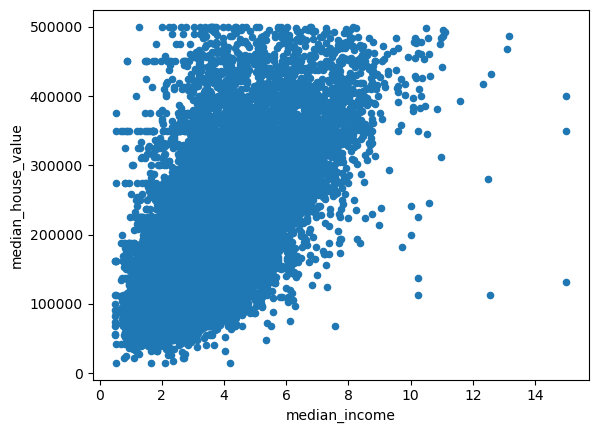

In [19]:
housing.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

## 표본

19,675개 구역의 1%에 해당하는 197개 구역의 데이터를 선택하여 표본으로 지정한다.
표본추출은 보통 무작위 추출 방식으로 진행되지만 경우에 따라 층화표집도 활용된다.

### 무작위 추출

무작위 추출은 모집단에서 임의로 하나의 값을 선택하는 방법이다.
아래 코드는 `housing`에 포함된 전체 구역의 1%를 무작위로 선택하기 위해
데이터프레임의 `sample()` 메서드를 호출한다.

In [20]:
random_sampling = housing.sample(frac=0.01, random_state=42)
random_sampling

,median_income,median_house_value
disstrict,,
15065,1.8357,104200.0
14534,4.2109,171200.0
13570,4.0481,97300.0
2607,3.5380,102700.0
12750,2.2000,116500.0
...,...,...
6687,3.3750,260400.0
219,2.8750,143800.0
19037,3.2768,117600.0


:::{admonition} 시드<font size='2'>seed</font>
:class: note

`sample()` 메서드의 `random_state=42`는 무작위 선택의 시드<font size='2'>seed</font>를 지정한다.
시드를 지정하지 않으면 아래 코드를 실행할 때마다 다른 값이 생성된다.
시드는 0을 포함하여 임의의 양의 정수를 사용된다.
:::

**표본통계량 vs. 모수**

무작위로 선택된 1968개 샘플들의 기초 통계정보는 다음과 같다.

In [21]:
random_stats = random_sampling.describe()
random_stats

,median_income,median_house_value
count,197.000000,197.000000
mean,3.742413,189908.121827
std,1.553336,93704.934938
min,0.980900,42100.000000
25%,2.584800,119300.000000
50%,3.538000,174500.000000
75%,4.642400,252600.000000
max,8.680300,479500.000000


모수, 즉 모집단의 통계량과 비슷하지만 약간 다르다.

In [22]:
housing_stats = housing.describe()
housing_stats

,median_income,median_house_value
count,19675.000000,19675.000000
mean,3.676717,192477.921017
std,1.570272,97711.509613
min,0.499900,14999.000000
25%,2.526800,116600.000000
50%,3.450000,173800.000000
75%,4.582600,248200.000000
max,15.000100,500000.000000


분산 또한 표본과 모집단의 정보가 조금 다르다.
앞서 설명한 대로 표본의 불편분산이 모집단의 (편향)분산보다 조금 더 크며,
따라서 값이 더 큰 모분산에 보다 가깝다.
모집단의 경우엔 편향분산을 사용해야 함에 주의한다.

- 표본의 불편분산

In [23]:
random_sampling.var()

median_income         2.412851e+00
median_house_value    8.780615e+09
dtype: float64

- 표본의 편향분산

In [24]:
random_sampling.var(ddof=0)

median_income         2.400603e+00
median_house_value    8.736043e+09
dtype: float64

- 모집단의 (편향)분산

In [25]:
housing.var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

### 층화표집

주택가격은 소득과 밀접하게 연관된다.
따라서 주택가격에 대한 표본통계량을 확인하고자 할 때
표본이 소득별로 적절한 비율을 유지하는지 확인할 필요가 있다.

**소득구간 지정**

아래 코드는 소득을 5개 구간으로 쪼개면서 동시에 1부터 5까지의 정수를 구간 이름으로 지정하고,
이를 `housing` 데이터프레임에 특성으로 추가한다.

| 구간 | 범위 |
| :---: | :--- |
| 1 | 0.0 - 1.5 |
| 2 | 1.5 - 3.0 |
| 3 | 3.0 - 4.5 |
| 4 | 4.5 - 6.0 |
| 5 | 6.0 -  |

In [26]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing

,median_income,median_house_value,income_cat
disstrict,,,
0,8.3252,452600.0,5
1,8.3014,358500.0,5
2,7.2574,352100.0,5
3,5.6431,341300.0,4
4,3.8462,342200.0,3
...,...,...,...
20635,1.5603,78100.0,2
20636,2.5568,77100.0,2
20637,1.7000,92300.0,2


소득구간별 도수를 히스토그램을 그리면 다음과 같다.

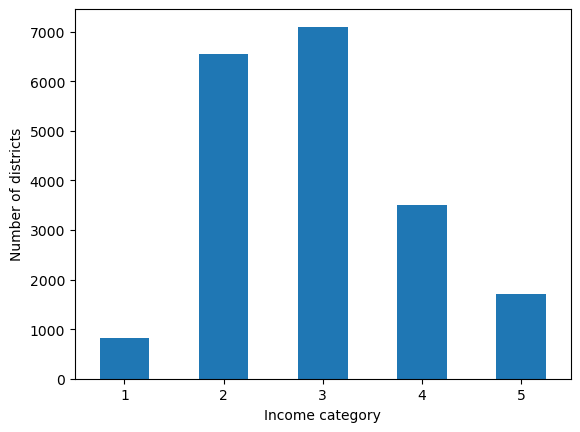

In [27]:
housing["income_cat"].value_counts().sort_index().plot(rot=0, grid=False, kind='bar')
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

**소득구간별 도수**

데이터프레임의 `groupby()` 메서드는 지정된 구간을 기준으로 데이터를 그룹화한다.
아래 코드는 `income_cat` 특성에 포함된 소득구간 값들을 기준으로 소득구간별로 데이터를 묶는다,
즉 5개의 그룹으로 묶는다.

In [28]:
stratification = housing.groupby('income_cat', observed=True, group_keys=True)

생성된 `DataFrameGroupBy` 객체는 내부를 바로 보여주지는 않는다.

In [29]:
type(stratification)

pandas.core.groupby.generic.DataFrameGroupBy

In [30]:
print(stratification)

하지만 내부적으로 아래 그림처럼 `income_cat`의 값에 따라 5개의 그룹으로 분류되어 있다.

<p><div align="center"><img src="https://raw.githubusercontent.com/codingalzi/DataSci/master/jupyter-book/images/groupby-1.png" style="width:360px"></div></p>

참고로 위 사진의 내용은 아래 코드처럼 `for` 반복문을 이용하여 확인할 수도 있지만,
그보다는 위 사진처럼 그룹화가 이루어진다는 것을 기억해두어야 한다.

코드에 사용된 `break` 명령문은 처음 두 개의 그룹만 화면에 출력하기 위함이다.
해당 `if` 조건문을 제거하면 5개의 그룹이 모두 출력된다. 

In [31]:
for name, group in stratification:
    print(f"그룹 {name}")
    print("---")
    print(group)
    print() # 한 칸 띄우기 용도
    if name == 2:
        break

그룹 1
---
           median_income  median_house_value income_cat
disstrict                                              
20                1.3578            147500.0          1
33                1.3750            104900.0          1
35                1.4861             97200.0          1
36                1.0972            104500.0          1
37                1.4103            103900.0          1
...                  ...                 ...        ...
20603             1.3375             59600.0          1
20610             1.3631             45500.0          1
20611             1.2857             47000.0          1
20612             1.4934             48300.0          1
20613             1.4958             53400.0          1

[814 rows x 3 columns]

그룹 2
---
           median_income  median_house_value income_cat
disstrict                                              
8                 2.0804            226700.0          2
13                2.6736            191300.0          2
14   

**`DataFrameGroupBy` 자료형 메서드**

`groupby()` 메서드에 의해 생성된 객체는 포함된 각각의 그룹에 대해 적용되는 
다양한 통계 메서드를 제공한다.

- `count()` 메서드: 그룹별 도수(항목수) 계산

In [32]:
stratification.count()

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


- `sum()` 메서드: 그룹별 모든 값들의 합 계산

In [33]:
stratification.sum()

,median_income,median_house_value
income_cat,,
1,988.6214,8.816690e+07
2,15234.0468,8.840968e+08
3,26161.8582,1.377902e+09
4,17960.4249,8.714170e+08
5,11994.4543,5.654208e+08


- `mean()` 메서드: 그룹별 평균값 계산

In [34]:
stratification.mean()

,median_income,median_house_value
income_cat,,
1,1.214523,108313.143735
2,2.325099,134935.408730
3,3.683212,193988.680698
4,5.128619,248834.094803
5,7.038999,331819.718310


- `std()` 메서드: 그룹별 표준편차 계산

In [35]:
stratification.std()

,median_income,median_house_value
income_cat,,
1,0.233626,69314.530601
2,0.406648,69001.703453
3,0.426619,81583.050538
4,0.410023,80596.339192
5,1.070536,80536.125453


- `var()` 메서드: 그룹별 분산 계산

In [36]:
stratification.var()

,median_income,median_house_value
income_cat,,
1,0.054581,4.804504e+09
2,0.165363,4.761235e+09
3,0.182003,6.655794e+09
4,0.168119,6.495770e+09
5,1.146047,6.486068e+09


**`apply()` 메서드**

`DataFrameGroupBy` 자료형이 제공하지 않지만 그룹별로 하나의 값을 계산하려면
`apply()` 메서드를 이용한다.

예를 들어 아래 코드는 그룹별로 1%의 샘플을 무작위로 추출한다.

In [37]:
stratified_sampling = stratification.apply(lambda y:y.sample(frac=0.01, random_state=42), include_groups=False)
stratified_sampling

median_income  median_house_value
income_cat disstrict                                   
1          4483              1.1868             93800.0
           13900             1.3811             51300.0
           3290              1.1650             53300.0
           4874              0.9234            187500.0
           12798             1.4861             63100.0
...                             ...                 ...
5          1346              6.0497            177500.0
           10792             7.8496            490800.0
           4026              6.1274            315900.0
           8991              6.4310            492500.0
           9179              7.6059            323700.0

[197 rows x 2 columns]

위 데이터프레임은 두 종류의 `income_cat`과 `disstrict` 두 종류의 인덱스를 포함하는
다중 인덱스를 사용한다.
다중 인덱스는 각각의 이름 또는 레벨 `level`로 구분된다.
레벨은 왼편에 위치한 인덱스부터 0, 1, 2, 등으로 지정된다.

여기서는 `income_cat`를 인덱스보다는 특성으로 사용하는 게 편하다.
아래 코드는 레벨을 이용하여 특정 인덱스를 특성으로 변환시키는 코드를 보여준다.

In [38]:
stratified_sampling = stratified_sampling.reset_index(level=0)
stratified_sampling

,income_cat,median_income,median_house_value
disstrict,,,
4483,1,1.1868,93800.0
13900,1,1.3811,51300.0
3290,1,1.1650,53300.0
4874,1,0.9234,187500.0
12798,1,1.4861,63100.0
...,...,...,...
1346,5,6.0497,177500.0
10792,5,7.8496,490800.0
4026,5,6.1274,315900.0


반드시 필요한 일은 아니지만 
이전 데이터프레임과의 형식을 맞추기 위해 `income_cat` 특성을 오른쪽 끝으로 보낸다.

In [39]:
stratified_sampling = stratified_sampling[['median_income', 'median_house_value', 'income_cat']]
stratified_sampling

,median_income,median_house_value,income_cat
disstrict,,,
4483,1.1868,93800.0,1
13900,1.3811,51300.0,1
3290,1.1650,53300.0,1
4874,0.9234,187500.0,1
12798,1.4861,63100.0,1
...,...,...,...
1346,6.0497,177500.0,5
10792,7.8496,490800.0,5
4026,6.1274,315900.0,5


아래 코드는 표본추출 결과를 소득구간 기준으로 그룹화를 진행한 다음에 각 구간별로 선택된 샘플의 개수를 확인한다.

In [40]:
stratified_sampling_count = stratified_sampling.groupby('income_cat', observed=False).count()
stratified_sampling_count

,median_income,median_house_value
income_cat,,
1,8,8
2,66,66
3,71,71
4,35,35
5,17,17


각 구간별 도수를 보면 모집단의 구간별 도수의 1%에 매우 가깝다는 것을 알 수 있다.

In [41]:
stratified_count = stratification.count()
stratified_count

,median_income,median_house_value
income_cat,,
1,814,814
2,6552,6552
3,7103,7103
4,3502,3502
5,1704,1704


### 무작위 추출 vs. 층화표집

소득구간 정보를 기억하면서 무작위 추출을 다시 진행하면
크기가 197인 표본이 생성된다.

In [42]:
random_sampling = housing.sample(frac=0.01, random_state=42)
random_sampling

,median_income,median_house_value,income_cat
disstrict,,,
15065,1.8357,104200.0,2
14534,4.2109,171200.0,3
13570,4.0481,97300.0,3
2607,3.5380,102700.0,3
12750,2.2000,116500.0,2
...,...,...,...
6687,3.3750,260400.0,3
219,2.8750,143800.0,2
19037,3.2768,117600.0,3


구간별로 무작위 추출된 그룹의 크기를 확인한다.

In [43]:
random_sampling_count = random_sampling.groupby('income_cat', observed=False).count()
random_sampling_count

,median_income,median_house_value
income_cat,,
1,6,6
2,67,67
3,64,64
4,39,39
5,21,21


**오차율 비교표**

무작위 추출과 층화표집의 결과를 소득구간별 상대도수를 기준으로 비교한다.

- 두 샘플의 크기

In [44]:
random_total = random_sampling_count.sum()
random_total

median_income         197
median_house_value    197
dtype: int64

In [45]:
stratified_total = stratified_sampling_count.sum()
stratified_total

median_income         197
median_house_value    197
dtype: int64

- 소득구간별 상대도수

In [46]:
random_sampling_ratio = random_sampling_count / random_total
random_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.030457,0.030457
2,0.340102,0.340102
3,0.324873,0.324873
4,0.197970,0.197970
5,0.106599,0.106599


In [47]:
stratified_sampling_ratio = stratified_sampling_count / stratified_total
stratified_sampling_ratio

,median_income,median_house_value
income_cat,,
1,0.040609,0.040609
2,0.335025,0.335025
3,0.360406,0.360406
4,0.177665,0.177665
5,0.086294,0.086294


- 모집단에서의 소득구간별 상대도수

In [48]:
stratified_ratio = stratified_count/(housing.shape)[0]
stratified_ratio

,median_income,median_house_value
income_cat,,
1,0.041372,0.041372
2,0.333011,0.333011
3,0.361017,0.361017
4,0.177992,0.177992
5,0.086607,0.086607


아래 코드는 두 샘플과 모집단의 소득구간별 상대도수를 하나로 묶어 데이터프레임을 생성한다.

In [49]:
proportions = pd.concat([stratified_ratio.iloc[:, [1]], 
                         stratified_sampling_ratio.iloc[:, [1]],
                         random_sampling_ratio.iloc[:, [1]]],
                        axis=1)

proportions.columns = ['전체(%)', '층화표집(%)', '무작위 추출(%)']
proportions.index.name = '소득구간'
proportions

,전체(%),층화표집(%),무작위 추출(%)
소득구간,,,
1,0.041372,0.040609,0.030457
2,0.333011,0.335025,0.340102
3,0.361017,0.360406,0.324873
4,0.177992,0.177665,0.197970
5,0.086607,0.086294,0.106599


모집단의 소득구간별 상대도수를 기준으로 샘플 각각에서의 상대도수와의 오차율을 추가한다.

In [50]:
proportions["층화표집 오차율(%)"] = (proportions["층화표집(%)"] / proportions["전체(%)"] - 1)
proportions["무작위 추출 오차율(%)"] = (proportions["무작위 추출(%)"] / proportions["전체(%)"] - 1)

proportions

,전체(%),층화표집(%),무작위 추출(%),층화표집 오차율(%),무작위 추출 오차율(%)
소득구간,,,,,
1,0.041372,0.040609,0.030457,-0.018446,-0.263835
2,0.333011,0.335025,0.340102,0.006048,0.021291
3,0.361017,0.360406,0.324873,-0.001691,-0.100116
4,0.177992,0.177665,0.197970,-0.001839,0.112236
5,0.086607,0.086294,0.106599,-0.003613,0.230830


보다 보기 쉽게 퍼센트로 계산된 데이터프레임을 지정한다.

In [51]:
proportions_percent = (proportions *100).round(2)
proportions_percent

,전체(%),층화표집(%),무작위 추출(%),층화표집 오차율(%),무작위 추출 오차율(%)
소득구간,,,,,
1,4.14,4.06,3.05,-1.84,-26.38
2,33.30,33.50,34.01,0.60,2.13
3,36.10,36.04,32.49,-0.17,-10.01
4,17.80,17.77,19.80,-0.18,11.22
5,8.66,8.63,10.66,-0.36,23.08


결과적으로 층화표집을 사용할 경우 표본의 소득구간별 상대도수가 모집단의 그것에 매우 근접함을 알 수 있다.

참고로 층화표집으로 생성된 샘플을 이용한 산점도는 다음과 같다.

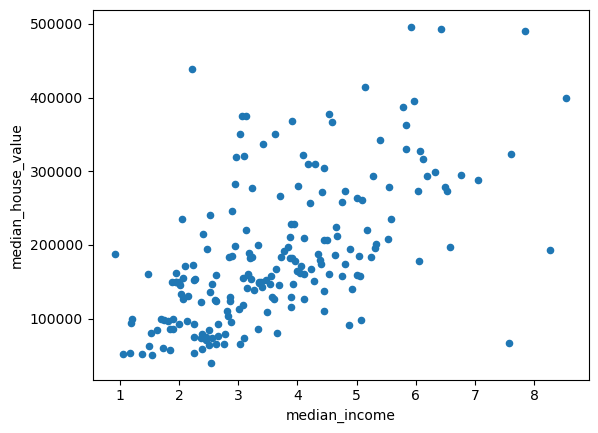

In [52]:
stratified_sampling.plot('median_income', 'median_house_value', kind='scatter')
plt.show()

층화표집으로 생성된 표본의 경우도 불편분산이 모집단의 (편향)분산에 보다 가깝다.
하지만 무작위 추출로 생성된 표본의 분산보다는 작다.

- 표본의 불편분산

In [53]:
stratified_sampling.iloc[:, :2].var()

median_income         2.317274e+00
median_house_value    9.486647e+09
dtype: float64

In [54]:
random_sampling.iloc[:, :2].var()

median_income         2.412851e+00
median_house_value    8.780615e+09
dtype: float64

- 표본의 편향분산

In [55]:
stratified_sampling.iloc[:, :2].var(ddof=0)

median_income         2.305512e+00
median_house_value    9.438491e+09
dtype: float64

In [56]:
random_sampling.iloc[:, :2].var(ddof=0)

median_income         2.400603e+00
median_house_value    8.736043e+09
dtype: float64

- 모집단의 (편향)분산

In [57]:
housing.iloc[:, :2].var(ddof=0)

median_income         2.465628e+00
median_house_value    9.547054e+09
dtype: float64

## 확률분포

모집단에서 임의로 표본을 선택하는 무작위 추출<font size='2'>random sampling</font> 방식의
결과는 미리 알 수 없다.
또한 무작위 추출을 실행할 때마다의 결과는 일반적으로 다르다. 
하지만 무작위 추출을 실행할 때 어떤 값이 나올 확률을 계산할 수 있는 경우가 있다.

예를 들어, 주사위를 던질 때 나오는 값은 1부터 6까지의 정수 중에서 무작위로 하나의 수를 선택하는
무작위 추출이다.
주사위를 던지면 어떤 값이 나올지는 모르지만 1부터 6까지의 정수 각각이 1/6의 확률로 나온다는
사실은 잘 알려져 있다.

### 확률변수와 확률분포

주사위를 던졌을 때 나올 수 있는 값을 가리키는 변수를 `X`라 하자.
`X`가 가리키는 값이 나올 확률은 정상적인 주사위인 경우 항상 1/6이다.
이처럼 무작위 추출을 수행할 때 어떤 값이 나올지를 미리 알 수는 없지만 
어떤 값이 나올 확률이 알려진 값을 가리키는 변수를
확률변수<font size='2'>random variable</font>라 부른다.

확률변수 `X`가 가리키는 값이 `k`이고 `n`이 나올 확률이 `p`일 때 다음과 같이 표기한다.

$$
P(X=k) = p
$$

주사위를 던졌을 때 나오는 값을 가리키는 확률변수 `X`가
1부터 6까지의 정수를 가리키는 확률이 동일하게 1/6이라는 
사실은 다음과 같이 표현된다.

$$
P(X=1) = P(X=2) = \cdots = P(X=6) = \frac1 6
$$

확률분포는 확률변수가 가리킬 수 있는 값들의 확률들의 구조를 가리킨다.
예를 들어, 주사위를 던졌을 때 나오는 값을 가리키는 확률변수 `X`의 확률분포는 다음과 같다.

| `X` | 1 | 2 | 3 | 4 | 5 | 6|
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

확률변수 `X`의 확률분포가 알려졌을 때 '확률변수 `X`는 해당 확률분포를 따른다.'라고 말한다.
예를 들어 주사위를 던졌을 때 나오는 값을 가리키는 변수 `X`는 위 확률분포를 따른다.

### 무작위 추출의 확률분포

`housing` 데이터셋을 이용하여 모집단의 확률분포와 무작위 추출의 관계를 설명한다.

변수 `X`가 소득범주를 가리키도록 했을 때, `X`는 아래 확률분포를 따르는 확률변수가 된다.

| `X` | 1 | 2 | 3 | 4 | 5 |
| :---: | :---: | :---: | :---: | :---: | :---: |
| 확률 | 0.041372 | 0.333011 | 0.361017 | 0.177992 | 0.086607 |

이유는 앞서 계산한 소득구간별 상대도수가 다음과 같기 때문이다.

In [64]:
proportions[['전체(%)', '무작위 추출(%)']]

,전체(%),무작위 추출(%)
소득구간,,
1,0.041372,0.030457
2,0.333011,0.340102
3,0.361017,0.324873
4,0.177992,0.197970
5,0.086607,0.106599


그리고 위 표에서 `무작위 추출(%)` 특성에서 확인되듯이
19,674구역의 1%인 197개 구역을 임의로 추출했을 때 소득구간별 상대도수가 모집단의 상대도수와 유사하다.
이렇듯 무작위 추출의 결과는 모집단의 확률분포와 밀접하게 관련된다.

하지만 이는 특별한 확률분포를 따르는 무작위 추출의 결과에 대한 이야기다.
무작위 추출은 실제로는 모집단의 확류분포와 상관없이 임의로 표본을 추출한다.
여기서 말하는 '임의의'는 '균등하게'를 의미한다.

### 무작위 추출과 균등분포

앞서 살펴보았듯이 무작위 추출로 생성된 표본은 모집단의 확률분포를 따른다.
따라서 모집단이 달라지면 무작위 추출로 생성된 표본의 확률분포도 달라진다.

예를 들어, ....

소득범주가 1부터 5까지의 정수를 가질 수 있기 때문에 
소득범주를 가리키는 확률변수 `X`의 시행은 1부터 5까지의 정수를 하나 무작위로 선택하는 것이다.
이를 모의실험하기 위해 `np.random.choice()` 함수를 이용한다.

예를 들어, 1부터 5까지의 정수 중에 하나를 무작위로 선택하는 방법은 다음과 같다.

In [63]:
np.random.choice(range(1, 6))

2

**균등분포**

그런데 `np.random.choice()` 함수는 기본적으로 균등분포<font size='2'>uniform distribution</font>다. 
즉, 위 코드를 반복 실행하면 1부터 5까지의 정수가 각각 1/5의 확률로 선택된다.
이또한 모의실험으로 확인할 수 있다.
아래 코드는 `np.random.choice()` 함수를 이용하여 1부터 5까지의 정수를 무작위로 1만 개 선택한다.

In [64]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), 10000)
sample.shape

(10000,)

아래 코드는 도수분포표를 작성한다.

In [65]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))
freq

array([1963, 2011, 1973, 2018, 2035])

1부터 5까지의 각 정수별 도수와 상대도수를 데이터프레임으로 확인하면
각각의 정수가 모두 20% 정도씩 선택되었음이 확인된다.

In [66]:
income_cat_freq10000 = pd.DataFrame({'도수': freq,
                                     '상대도수': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,도수,상대도수
1,1963,0.1963
2,2011,0.2011
3,1973,0.1973
4,2018,0.2018
5,2035,0.2035


**확률분포를 따르는 무작위 추출**

`np.random.choice()` 함수가 특정 확률분포를 따르도록 할 수 있다.
예를 들어 1부터 5까지의 정수를 앞서 확인한
캘리포니아 주택가격의 소득범주를 따르도록 하면서 무작위로 하나의 정수를 선택하게 하려면
다음과 같이 한다.

먼저 소득범주를 가리키는 확률변수 `X`의 확률분포를 아래와 같이 1차원 어레이로 지정한다.

In [67]:
prob_X = proportions['전체(%)'].values

이제 아래 코드는 1부터 5까지의 정수를 `X`의 확률분포를 따르면서 무작위로 정수를 선택한다.

In [68]:
np.random.seed(42)

np.random.choice(range(1, 6), p=prob_X)

2

이전과 유사하게 1만 개의 정수를 선택하도록 한다.

In [69]:
np.random.seed(42)

random_trial = 10000
sample = np.random.choice(range(1, 6), 10000, p=prob_X)
sample.shape

(10000,)

다시 한 번 도수분포표를 확인하면 다음과 같다.

In [70]:
freq, _ = np.histogram(sample, bins=5, range=(1, 6))

income_cat_freq10000 = pd.DataFrame({'도수': freq,
                                     '상대도수': freq/random_trial},
                                    index=range(1, 6))

income_cat_freq10000

,도수,상대도수
1,431,0.0431
2,3379,0.3379
3,3592,0.3592
4,1771,0.1771
5,827,0.0827


상대도수를 보면 `prob_X`와 매우 유사함이 확인된다.

In [71]:
prob_X

array([0.041372, 0.333011, 0.361017, 0.177992, 0.086607])

In [72]:
income_cat_freq10000['상대도수']

1    0.0431
2    0.3379
3    0.3592
4    0.1771
5    0.0827
Name: 상대도수, dtype: float64

위 결과를 히스토그램으로 확인한다.
아래 그림에서 5개의 빨간선은 `prob_X`의 구간별 상대도수를 표시한다.

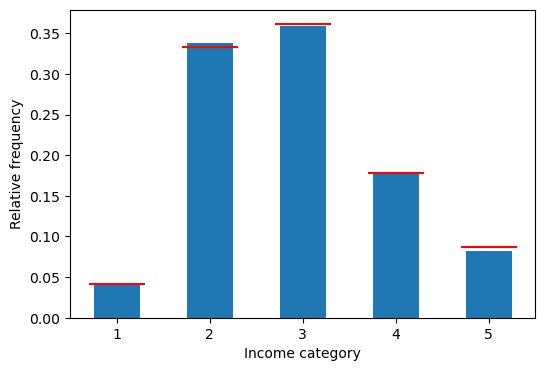

In [73]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

_ = income_cat_freq10000['상대도수'].plot.bar(ax=ax, rot=0)
ax.hlines(prob_X, np.arange(-0.3, 4), np.arange(0.3, 4.5), colors='red')
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

**`plt.hist()` 함수 활용**

동일한 그림을 표본 데이터를 이용하여 그릴 수도 있다.
`plt.hist()` 함수를 호출할 때 `density=True`를 지정하면 도수 대신에 상대도수를 막대그래프 형식으로 그린다.

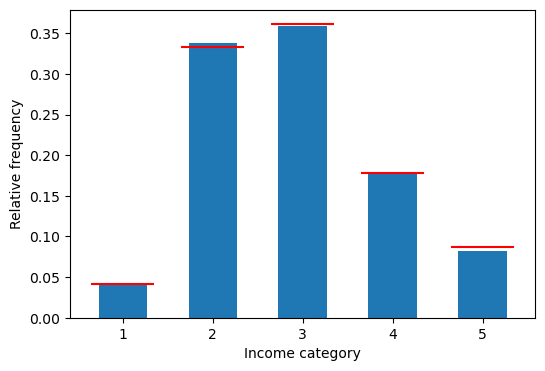

In [74]:
fig = plt.figure(figsize=(6,4 ))
ax = fig.add_subplot(111)

ax.hist(sample, bins=5, range=(1, 6), density=True, rwidth=0.54)
ax.hlines(prob_X, np.arange(1.15, 6), np.arange(1.85, 6), colors='red')

ax.set_xticks(np.linspace(1.5, 5.5, 5))
ax.set_xticklabels(np.arange(1, 6))
ax.set_xlabel('Income category')
ax.set_ylabel('Relative frequency')
plt.show()

## 표본평균의 분포

**무작위 추출 활용**

In [75]:
total_number = housing.shape[0]
total_number

19675

**1% 표본추출**

In [76]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent]
sampling

,median_income,median_house_value,income_cat
5439,6.0804,420000.0,5
13059,3.1654,111600.0,3
6778,4.2944,354700.0,3
801,4.7083,190900.0,4
10383,3.4115,184800.0,3
...,...,...,...
16157,3.7036,369200.0,3
3817,5.2118,215800.0,4
19516,1.3036,75000.0,1
19020,4.4375,132600.0,3


In [77]:
ten_percent = np.random.choice(total_number, total_number//10)

sampling = housing.iloc[ten_percent, :2]
sampling.mean()

median_income              3.669164
median_house_value    189311.642095
dtype: float64

**표본추출 반복**

아래 코드는 무작위 추출을 5번 반복한다.

In [78]:
for i in range(5):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    print(f"{i+1}번째 표본추출:")
    print(sampling.mean())
    print()

1번째 표본추출:
median_income              3.670952
median_house_value    192423.538383
dtype: float64

2번째 표본추출:
median_income              3.685474
median_house_value    191303.050330
dtype: float64

3번째 표본추출:
median_income              3.697356
median_house_value    193386.120488
dtype: float64

4번째 표본추출:
median_income              3.694461
median_house_value    195169.903406
dtype: float64

5번째 표본추출:
median_income              3.649889
median_house_value    191354.651246
dtype: float64



아래 코드는 무작위 추출 10,000 반복하면서 표본평균을 모든다.

In [79]:
sampling_count = 10000

income_mean = np.zeros(sampling_count)

for i in range(sampling_count):
    ten_percent = np.random.choice(total_number, total_number//10)

    sampling = housing.iloc[ten_percent, :2]
    income_mean[i] = sampling['median_income'].mean()

모아진 10,000개의 표본평균 자체로 새로운 분포를 가지며 표본평균의 평균값은 다음과 같다.

In [80]:
np.mean(income_mean)

3.676479

표본평균의 분산이 매우 작다.

In [81]:
np.var(income_mean)

0.001247

모집단의 평균값과 표본평균의 평균값이 매우 유사하다.

In [82]:
housing['median_income'].mean()

3.676717